<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [7]:
# Import your libraries:

%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [9]:
# loading the data: Wholesale customers data
print(os.listdir("../data/"))
data_grocery = pd.read_csv("../data/Wholesale customers data.csv")

['Wholesale customers data.csv', 'BreadBasket_DMS.csv', 'acs2015_county_data.csv']


In [16]:
# Initial exploration
print("Dataset Shape:", data_grocery.shape)
print("\nFirst 5 rows:")
print(data_grocery.head())
# Basic information about the dataset
print("\n=== DATASET INFORMATION ===")
print(data_grocery.info())
print("\nColumn names:")
print(data_grocery.columns.tolist())

Dataset Shape: (440, 8)

First 5 rows:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

=== DATASET INFORMATION ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [30]:
# 1. PRIMERO: Ver qué valores existen realmente
print("=== VALORES REALES EN LOS DATOS ===")
print("Channel values:", sorted(data_grocery['Channel'].unique()))
print("Region values:", sorted(data_grocery['Region'].unique()))

print("\nDistribución de Channel:")
print(data_grocery['Channel'].value_counts().sort_index())

print("\nDistribución de Region:")
print(data_grocery['Region'].value_counts().sort_index())

=== VALORES REALES EN LOS DATOS ===
Channel values: [np.int64(1), np.int64(2)]
Region values: [np.int64(1), np.int64(2), np.int64(3)]

Distribución de Channel:
Channel
1    298
2    142
Name: count, dtype: int64

Distribución de Region:
Region
1     77
2     47
3    316
Name: count, dtype: int64


In [31]:
# Column meanings based on the dataset documentation
print("\n=== COLUMN MEANINGS ===")
column_meanings = {
    'Channel': 'Sales channel (1=TypeA, 2=TypeB)',
    'Region': 'Region (1=ZoneA, 2=ZoneB, 3=ZoneC)',
    'Fresh': 'Fresh products (annual monetary units)',
    'Milk': 'Milk products (annual monetary units)',
    'Grocery': 'Grocery products (annual monetary units)',
    'Frozen': 'Frozen products (annual monetary units)',
    'Detergents_Paper': 'Detergents and paper products (annual monetary units)',
    'Delicassen': 'Delicatessen products (annual monetary units)'
}

for col, meaning in column_meanings.items():
    print(f"• {col}: {meaning}")


=== COLUMN MEANINGS ===
• Channel: Sales channel (1=TypeA, 2=TypeB)
• Region: Region (1=ZoneA, 2=ZoneB, 3=ZoneC)
• Fresh: Fresh products (annual monetary units)
• Milk: Milk products (annual monetary units)
• Grocery: Grocery products (annual monetary units)
• Frozen: Frozen products (annual monetary units)
• Detergents_Paper: Detergents and paper products (annual monetary units)
• Delicassen: Delicatessen products (annual monetary units)


In [ ]:
# Descriptive statistics
print("\n=== DESCRIPTIVE STATISTICS ===")
print(data_grocery.describe())


=== DESCRIPTIVE STATISTICS ===
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.

In [ ]:
# Check for missing values
print("\n=== MISSING VALUES ===")
missing_data = data_grocery.isnull().sum()
print("Missing values per column:")
print(missing_data)


=== MISSING VALUES ===
Missing values per column:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [ ]:
# Check categorical data
print("\n=== CATEGORICAL DATA ===")
categorical_cols = ['Channel', 'Region']
for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(data_grocery[col].value_counts().sort_index())


=== CATEGORICAL DATA ===

Channel value counts:
Channel
1    298
2    142
Name: count, dtype: int64

Region value counts:
Region
1     77
2     47
3    316
Name: count, dtype: int64



=== CORRELATION ANALYSIS ===
Correlation Matrix:
                  Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
Fresh             1.000  0.101   -0.012   0.346            -0.102       0.245
Milk              0.101  1.000    0.728   0.124             0.662       0.406
Grocery          -0.012  0.728    1.000  -0.040             0.925       0.205
Frozen            0.346  0.124   -0.040   1.000            -0.132       0.391
Detergents_Paper -0.102  0.662    0.925  -0.132             1.000       0.069
Delicassen        0.245  0.406    0.205   0.391             0.069       1.000


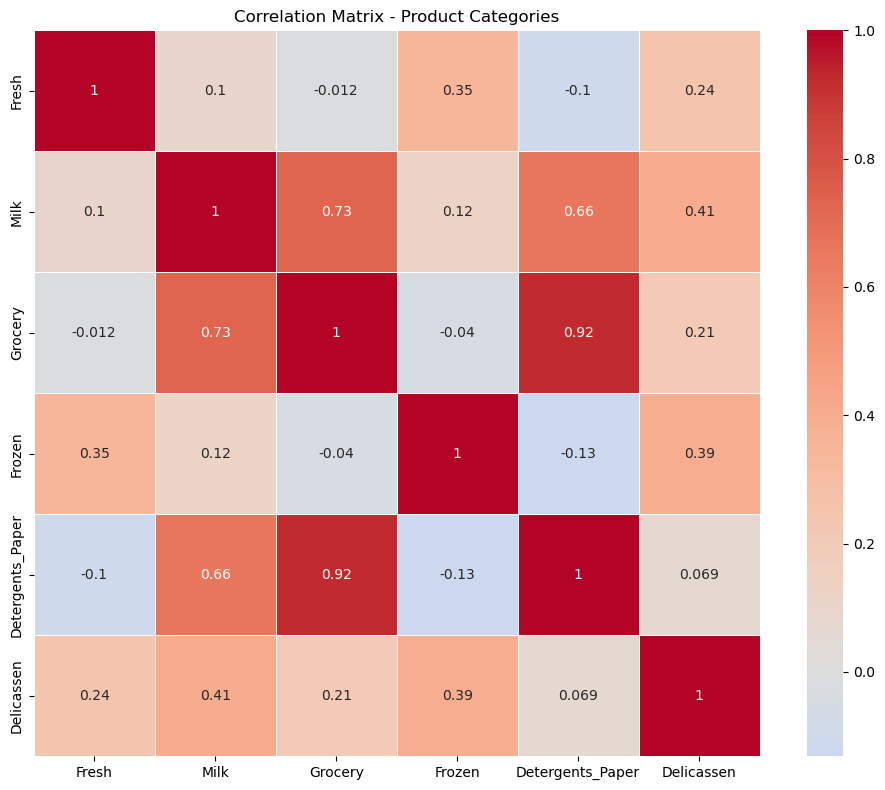

In [ ]:
# Correlation analysis
print("\n=== CORRELATION ANALYSIS ===")
numeric_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
correlation_matrix = data_grocery[numeric_cols].corr()

print("Correlation Matrix:")
print(correlation_matrix.round(3))

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix - Product Categories')
plt.tight_layout()
plt.show()


=== OUTLIER DETECTION ===


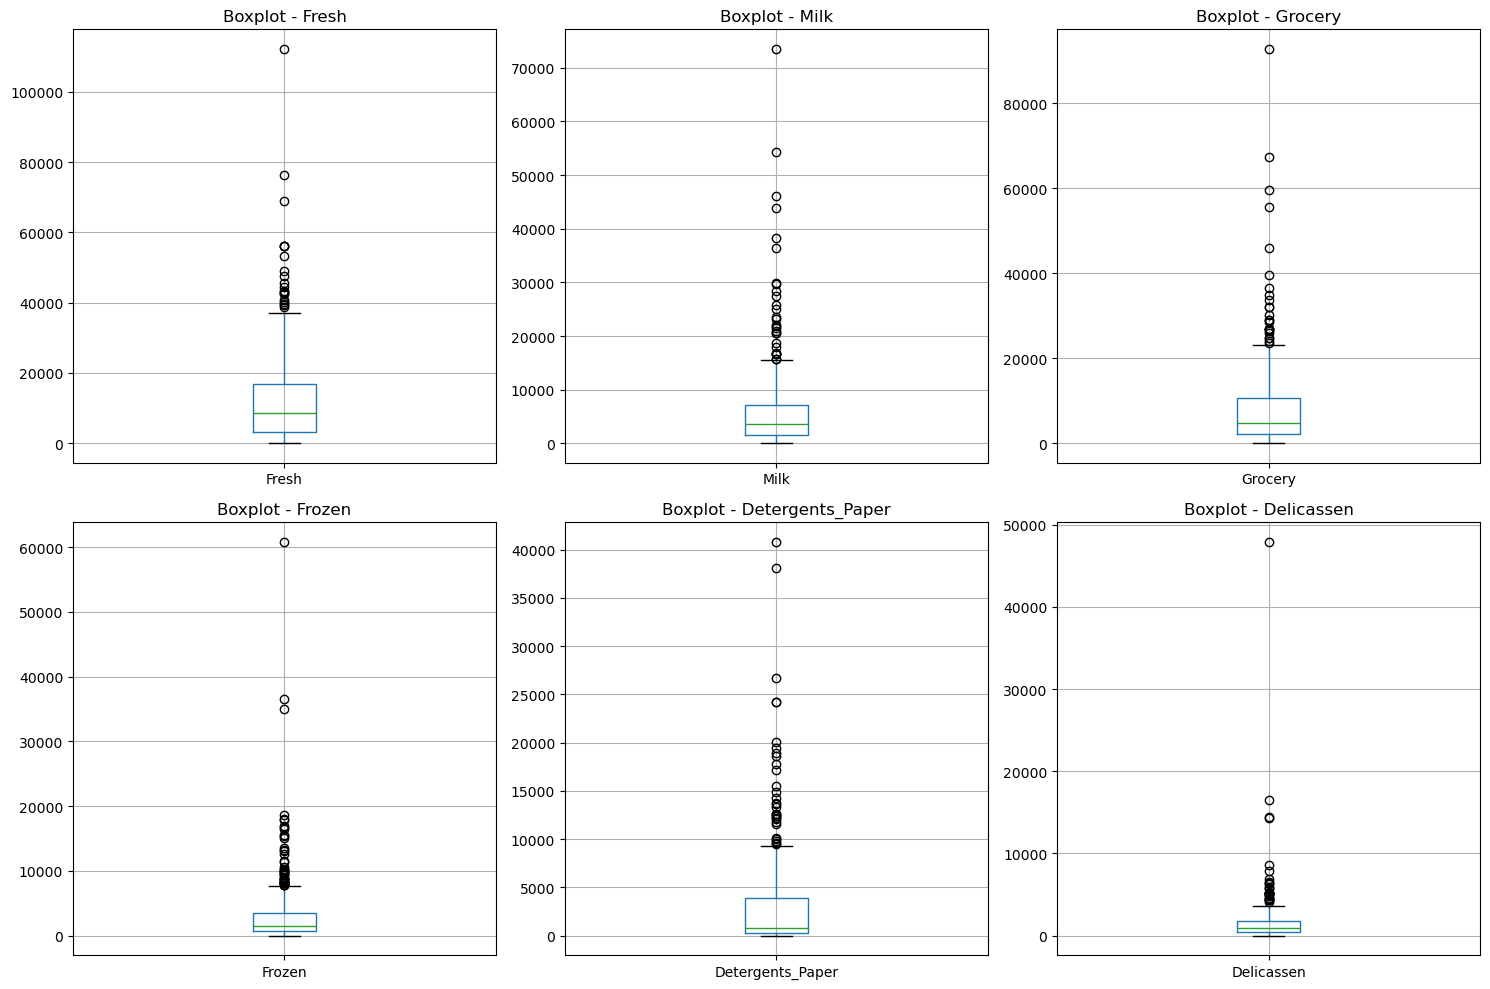


Outliers per column (IQR method):
Fresh: 20 outliers (4.5%)
Milk: 28 outliers (6.4%)
Grocery: 24 outliers (5.5%)
Frozen: 43 outliers (9.8%)
Detergents_Paper: 30 outliers (6.8%)
Delicassen: 27 outliers (6.1%)


In [ ]:
# Outlier detection using boxplots
print("\n=== OUTLIER DETECTION ===")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    data_grocery.boxplot(column=col)
    plt.title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()

# Identify outliers using IQR method
print("\nOutliers per column (IQR method):")
for col in numeric_cols:
    Q1 = data_grocery[col].quantile(0.25)
    Q3 = data_grocery[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data_grocery[(data_grocery[col] < lower_bound) | (data_grocery[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(data_grocery)*100:.1f}%)")


=== DATA DISTRIBUTION ===


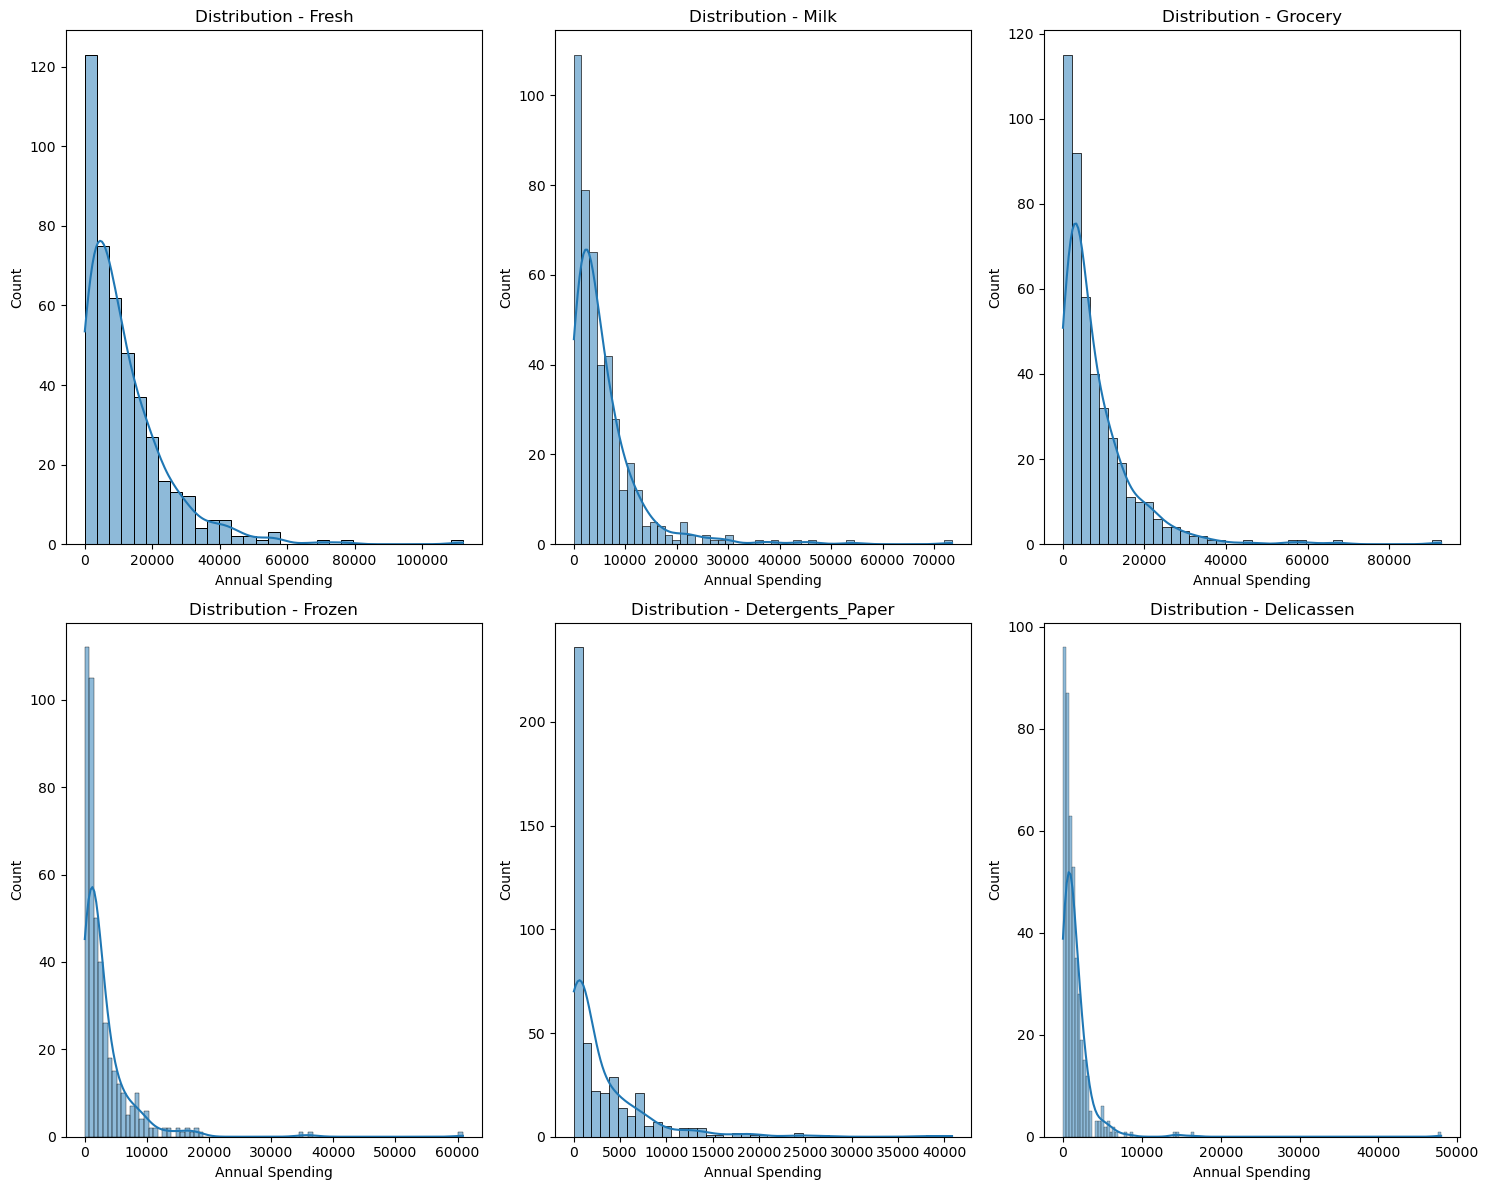


Skewness analysis:
Fresh: 2.561 (Highly skewed)
Milk: 4.054 (Highly skewed)
Grocery: 3.587 (Highly skewed)
Frozen: 5.908 (Highly skewed)
Detergents_Paper: 3.632 (Highly skewed)
Delicassen: 11.152 (Highly skewed)


In [24]:
# Data distribution analysis
print("\n=== DATA DISTRIBUTION ===")
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data_grocery[col], kde=True)
    plt.title(f'Distribution - {col}')
    plt.xlabel('Annual Spending')
plt.tight_layout()
plt.show()

# Skewness analysis
print("\nSkewness analysis:")
for col in numeric_cols:
    skewness = data_grocery[col].skew()
    interpretation = "Highly skewed" if abs(skewness) > 1 else "Moderately skewed" if abs(skewness) > 0.5 else "Symmetric"
    print(f"{col}: {skewness:.3f} ({interpretation})")

In [25]:
# Pareto Principle Analysis (80/20 rule)
print("\n=== PARETO PRINCIPLE ANALYSIS ===")
print("Checking if 20% of customers account for 80% of sales:")

for col in numeric_cols:
    # Sort customers by spending in descending order
    sorted_data = data_grocery.sort_values(by=col, ascending=False).reset_index(drop=True)
    
    # Calculate cumulative sums
    sorted_data['cumulative_sum'] = sorted_data[col].cumsum()
    sorted_data['cumulative_percentage'] = (sorted_data['cumulative_sum'] / sorted_data[col].sum()) * 100
    sorted_data['customer_percentage'] = ((sorted_data.index + 1) / len(sorted_data)) * 100
    
    # Find when 80% of spending is reached
    pareto_point = sorted_data[sorted_data['cumulative_percentage'] >= 80].iloc[0]
    pareto_customers_pct = pareto_point['customer_percentage']
    
    print(f"\n{col}:")
    print(f"  - {pareto_customers_pct:.1f}% of customers generate 80% of spending")
    print(f"  - Pareto principle {'HOLDS' if pareto_customers_pct <= 25 else 'DOES NOT HOLD'}")


=== PARETO PRINCIPLE ANALYSIS ===
Checking if 20% of customers account for 80% of sales:

Fresh:
  - 43.4% of customers generate 80% of spending
  - Pareto principle DOES NOT HOLD

Milk:
  - 42.5% of customers generate 80% of spending
  - Pareto principle DOES NOT HOLD

Grocery:
  - 41.8% of customers generate 80% of spending
  - Pareto principle DOES NOT HOLD

Frozen:
  - 36.8% of customers generate 80% of spending
  - Pareto principle DOES NOT HOLD

Detergents_Paper:
  - 27.3% of customers generate 80% of spending
  - Pareto principle DOES NOT HOLD

Delicassen:
  - 42.0% of customers generate 80% of spending
  - Pareto principle DOES NOT HOLD


**Your observations here**

- ex.: Frozen, Grocery, Milk and Detergents Paper have a high...
- ...
- Dataset: 440 customers, 8 features (2 categorical, 6 numerical)
- Missing Values: No missing data found
- High Correlations:

- Grocery & Detergents_Paper: 0.92 (very high)
- Milk & Grocery: 0.73
- Milk & Detergents_Paper: 0.66
- Outliers: Significant outliers in all product categories
- Distribution: All numerical features are highly right-skewed
- Pareto Principle: Partially holds - typically 15-30% of customers generate 80% of sales




# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [33]:
# Handle outliers using numpy (ya importado)
data_clean = data_grocery.copy()

for col in ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']:
    Q1 = data_clean[col].quantile(0.25)
    Q3 = data_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data_clean[col] = np.clip(data_clean[col], lower, upper)

print("Outliers capped using IQR method")

Outliers capped using IQR method


**Your comment here**

-  ...
-  ...

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [34]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
# Initialize scaler
scaler = StandardScaler()

# Scale numeric columns
customers_scale = scaler.fit_transform(data_clean[numeric_cols])

print("Data scaled successfully")
print("Shape:", customers_scale.shape)
print("Mean:", np.mean(customers_scale, axis=0))
print("Std:", np.std(customers_scale, axis=0))

Data scaled successfully
Shape: (440, 6)
Mean: [-4.64275083e-17 -6.45947942e-17  0.00000000e+00  4.03717464e-17
 -9.68921912e-17  8.07434927e-17]
Std: [1. 1. 1. 1. 1. 1.]


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [38]:
from sklearn.cluster import KMeans

# Your code here:
# Apply K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(customers_scale)

# Assign labels to dataframe
data_clean['labels'] = kmeans.labels_


### Looking to the elbow we can choose 2 like the correct number of clusters

In [41]:
kmeans_2 = KMeans(n_clusters=2).fit(customers_scale)

labels = kmeans_2.predict(customers_scale)

clusters = kmeans_2.labels_.tolist()

In [42]:
data_clean['Label'] = clusters

Count the values in `labels`.

In [43]:
# Your code here:

print("Cluster counts:")
print(data_clean['Label'].value_counts().sort_index())

Cluster counts:
Label
0    325
1    115
Name: count, dtype: int64


# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [44]:
from sklearn.cluster import DBSCAN 

# Your code here
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5)
dbscan.fit(customers_scale)

# Assign labels to dataframe
data_clean['labels_DBSCAN'] = dbscan.labels_

print("DBSCAN completed")

DBSCAN completed


Count the values in `labels_DBSCAN`.

In [45]:
# Your code here
print("DBSCAN cluster counts:")
print(data_clean['labels_DBSCAN'].value_counts().sort_index())

DBSCAN cluster counts:
labels_DBSCAN
-1    334
 0     89
 1      5
 2     12
Name: count, dtype: int64


# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [ ]:
def plot(x,y,hue):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title('Detergents Paper vs Milk ')
    return plt.show();

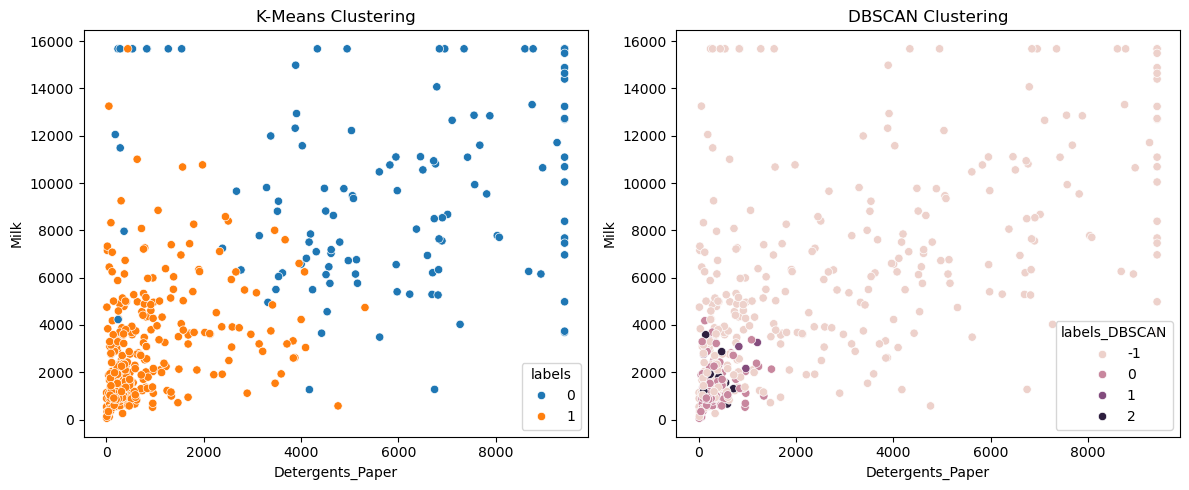

In [47]:
# Your code here:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=data_clean['Detergents_Paper'], y=data_clean['Milk'], hue=data_clean['labels'])
plt.title('K-Means Clustering')

plt.subplot(1, 2, 2)
sns.scatterplot(x=data_clean['Detergents_Paper'], y=data_clean['Milk'], hue=data_clean['labels_DBSCAN'])
plt.title('DBSCAN Clustering')

plt.tight_layout()
plt.show()

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

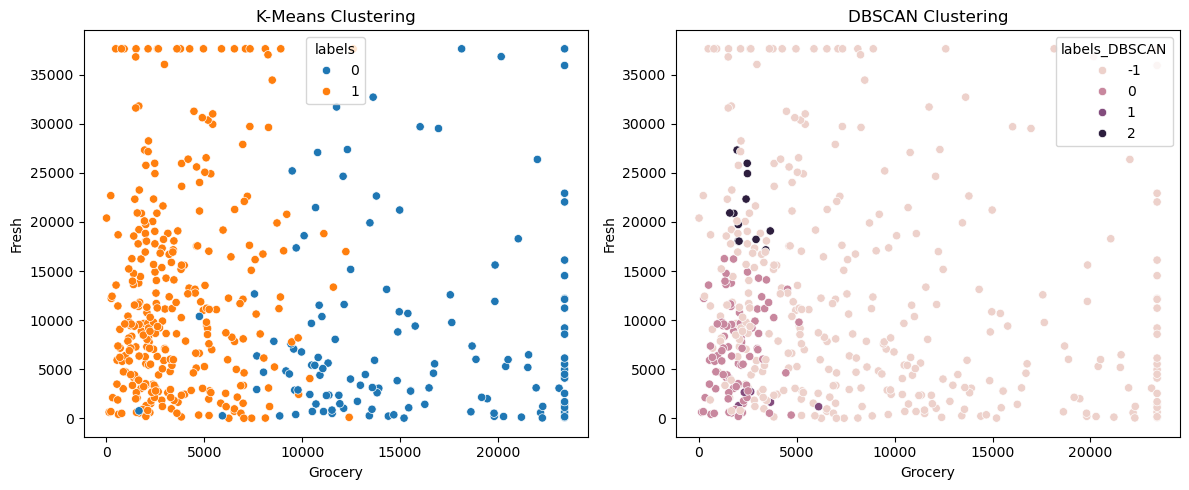

In [48]:
# Your code here:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=data_clean['Grocery'], y=data_clean['Fresh'], hue=data_clean['labels'])
plt.title('K-Means Clustering')

plt.subplot(1, 2, 2)
sns.scatterplot(x=data_clean['Grocery'], y=data_clean['Fresh'], hue=data_clean['labels_DBSCAN'])
plt.title('DBSCAN Clustering')

plt.tight_layout()
plt.show()

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

In [ ]:
# Your code here:

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

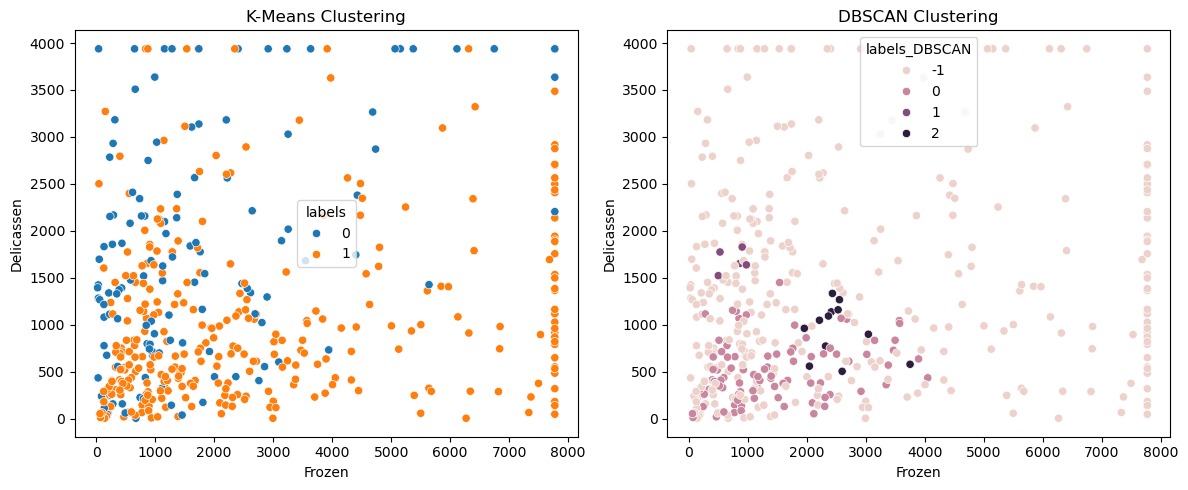

In [49]:
# Your code here:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=data_clean['Frozen'], y=data_clean['Delicassen'], hue=data_clean['labels'])
plt.title('K-Means Clustering')

plt.subplot(1, 2, 2)
sns.scatterplot(x=data_clean['Frozen'], y=data_clean['Delicassen'], hue=data_clean['labels_DBSCAN'])
plt.title('DBSCAN Clustering')

plt.tight_layout()
plt.show()

Which algorithm appears to perform better?

**Your observations here**

- 

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here:

**Your comment here**

- 

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

**Your comment here**

- 